In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skyfield.api import load, EarthSatellite, wgs84
from datetime import datetime


def plot_tle(tlea, tleb):
    
    ts = load.timescale()
    
    
    satellitea = EarthSatellite(tlea[0], tlea[1],'CARTOSAT-2F',ts)
    satelliteb = EarthSatellite(tleb[0], tleb[1],'CARTOSAT-2F',ts)
    
    
    t0 = satellitea.epoch
    minutes = np.linspace(0, 95, 100)
    t = ts.tt(jd=t0.tt + minutes / (60 * 24)) 
    
    # 6. Propagate (SGP4 Execution)
    positiona = satellitea.at(t).position.km
    positionb = satelliteb.at(t).position.km
    Requatorialkm = wgs84.radius.km
    
    dataA = {
        'Time_Minutes': minutes,
        'X_km': positiona[0, :], 'Y_km': positiona[1, :], 'Z_km': positiona[2, :],
    }
    dfa = pd.DataFrame(dataA)
    dfa['Altitude_km'] = np.linalg.norm(positiona, axis=0) - Requatorialkm
    dfa['TLE Source'] = 'TLE A'

    dataB = {
        'Time_Minutes': minutes,
        'X_km': positionb[0, :], 'Y_km': positionb[1, :], 'Z_km': positionb[2, :],
    }
    dfb = pd.DataFrame(dataB)
    dfb['Altitude_km'] = np.linalg.norm(positionb, axis=0) - Requatorialkm
    dfb['TLE_Source'] = 'TLE B'
    
    
    
    # Plot : Altitude vs Time
    plt.figure(figsize=(10, 5))
    plt.plot(dfa['Time_Minutes'], dfa['Altitude_km'], label='TLE position 1 Altitude')
    plt.plot(dfb['Time_Minutes'], dfb['Altitude_km'], label='TLE position 2 Altitude')
    plt.title('Satellite Altitude vs. Time (SGP4 Propagation)')
    plt.xlabel('Time from TLE 1 Epoch (Minutes)')
    plt.ylabel('Altitude_KM (km)')
    plt.legend()
    #plt.grid(True)
    plt.show() 

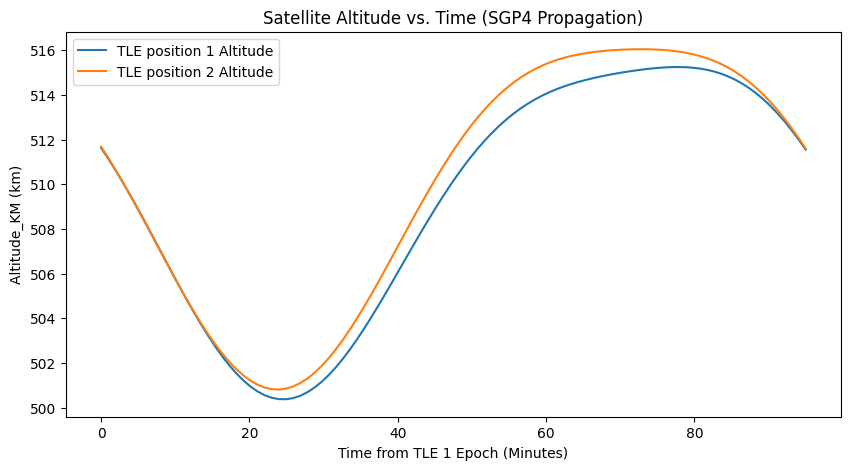

In [7]:
#execute fn
fd = pd.read_csv('CARTOSAT-2F.csv')
#df = fd.iloc[:,1:]
df = fd.iloc[:, -2:]
plot_tle(df.iloc[0,:],df.iloc[7,:])
